In [5]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Path ke folder data
data_dir = 'data'
emotion_labels = os.listdir(os.path.join(data_dir, 'train'))

# Ukuran gambar
IMG_SIZE = 48

# Fungsi untuk memuat gambar
def load_data(folder):
    images = []
    labels = []
    for label_idx, emotion in enumerate(emotion_labels):
        emotion_folder = os.path.join(folder, emotion)
        for file in os.listdir(emotion_folder):
            img_path = os.path.join(emotion_folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                images.append(img)
                labels.append(label_idx)
    return np.array(images), np.array(labels)

# Load data train dan test
X_train, y_train = load_data(os.path.join(data_dir, 'train'))
X_test, y_test = load_data(os.path.join(data_dir, 'test'))

# Normalisasi gambar ke rentang [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Tambahkan channel dimension (grayscale)
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# One-hot encoding untuk label
y_train_cat = to_categorical(y_train, num_classes=len(emotion_labels))
y_test_cat = to_categorical(y_test, num_classes=len(emotion_labels))

# Optional: Split validation dari training set
X_train, X_val, y_train_cat, y_val_cat = train_test_split(
    X_train, y_train_cat, test_size=0.1, random_state=42
)

print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")


Training data: (25838, 48, 48, 1), Validation data: (2871, 48, 48, 1), Test data: (7178, 48, 48, 1)


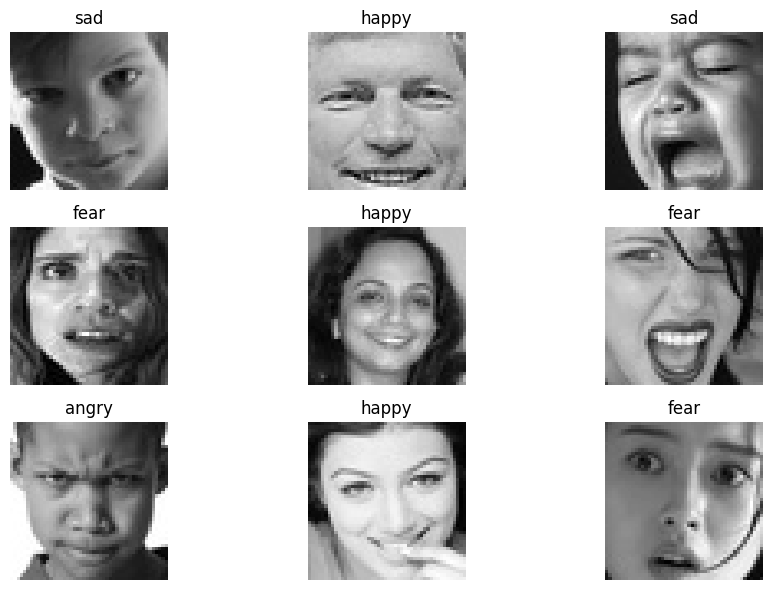

In [7]:
import random

# Tampilkan beberapa gambar secara acak
plt.figure(figsize=(10, 6))
for i in range(9):
    idx = random.randint(0, len(X_train) - 1)
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[idx].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(emotion_labels[np.argmax(y_train_cat[idx])])
    plt.axis('off')
plt.tight_layout()
plt.show()
